<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.410034,76.321619,33.512245,-0.001927,180.241970,180.244500,-0.002529
1,0.0,1.0,31.136544,68.374054,50.011540,0.003937,159.526076,159.521007,0.005069
2,0.0,2.0,81.057391,94.876400,58.690239,-0.000762,244.623269,244.625528,-0.002260
3,0.0,3.0,87.771552,80.653179,80.139692,-0.001767,258.562656,258.566640,-0.003984
4,0.0,4.0,64.341393,40.028917,72.101948,-0.002714,186.469543,186.473863,-0.004320
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.002650,20.641841,94.193833,0.008660,159.846984,159.835751,0.011233
59996,999.0,56.0,68.524439,23.035681,65.063582,-0.003835,166.619868,166.623862,-0.003994
59997,999.0,57.0,75.825505,71.857298,38.654638,-0.003284,196.334158,196.339974,-0.005816
59998,999.0,58.0,49.695181,36.294657,96.315977,0.006784,192.312599,192.304048,0.008551


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.410034,76.321619,33.512245,-0.001927,180.241970,180.244500,-0.002529
1,0.0,1.0,31.136544,68.374054,50.011540,0.003937,159.526076,159.521007,0.005069
2,0.0,2.0,81.057391,94.876400,58.690239,-0.000762,244.623269,244.625528,-0.002260
3,0.0,3.0,87.771552,80.653179,80.139692,-0.001767,258.562656,258.566640,-0.003984
4,0.0,4.0,64.341393,40.028917,72.101948,-0.002714,186.469543,186.473863,-0.004320
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.002650,20.641841,94.193833,0.008660,159.846984,159.835751,0.011233
59996,999.0,56.0,68.524439,23.035681,65.063582,-0.003835,166.619868,166.623862,-0.003994
59997,999.0,57.0,75.825505,71.857298,38.654638,-0.003284,196.334158,196.339974,-0.005816
59998,999.0,58.0,49.695181,36.294657,96.315977,0.006784,192.312599,192.304048,0.008551


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    60.410034  76.321619  33.512245  ...  180.241970  180.244500 -0.002529
      1.0    31.136544  68.374054  50.011540  ...  159.526076  159.521007  0.005069
      2.0    81.057391  94.876400  58.690239  ...  244.623269  244.625528 -0.002260
      3.0    87.771552  80.653179  80.139692  ...  258.562656  258.566640 -0.003984
      4.0    64.341393  40.028917  72.101948  ...  186.469543  186.473863 -0.004320
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   35.002650  20.641841  94.193833  ...  159.846984  159.835751  0.011233
      56.0   68.524439  23.035681  65.063582  ...  166.619868  166.623862 -0.003994
      57.0   75.825505  71.857298  38.654638  ...  196.334158  196.339974 -0.005816
      58.0   49.695181  36.294657  96.315977  ...  192.312599  192.304048  0.008551
      59.0   68.060702  46.954030  59.914846  ...  184.932557  184.930386  0.002171

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    60.410034  76.321619  33.512245  ...  180.241970  180.244500 -0.002529
      1.0    31.136544  68.374054  50.011540  ...  159.526076  159.521007  0.005069
      2.0    81.057391  94.876400  58.690239  ...  244.623269  244.625528 -0.002260
      3.0    87.771552  80.653179  80.139692  ...  258.562656  258.566640 -0.003984
      4.0    64.341393  40.028917  72.101948  ...  186.469543  186.473863 -0.004320
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   35.002650  20.641841  94.193833  ...  159.846984  159.835751  0.011233
      56.0   68.524439  23.035681  65.063582  ...  166.619868  166.623862 -0.003994
      57.0   75.825505  71.857298  38.654638  ...  196.334158  196.339974 -0.005816
      58.0   49.695181  36.294657  96.315977  ...  192.312599  192.304048  0.008551
      59.0   68.060702  46.954030  59.914846  ...  184.932557  184.930386  0.002171

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.410034,76.321619,33.512245,-0.001927,180.241970,180.244500,-0.002529
1,0.0,1.0,31.136544,68.374054,50.011540,0.003937,159.526076,159.521007,0.005069
2,0.0,2.0,81.057391,94.876400,58.690239,-0.000762,244.623269,244.625528,-0.002260
3,0.0,3.0,87.771552,80.653179,80.139692,-0.001767,258.562656,258.566640,-0.003984
4,0.0,4.0,64.341393,40.028917,72.101948,-0.002714,186.469543,186.473863,-0.004320
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.002650,20.641841,94.193833,0.008660,159.846984,159.835751,0.011233
59996,999.0,56.0,68.524439,23.035681,65.063582,-0.003835,166.619868,166.623862,-0.003994
59997,999.0,57.0,75.825505,71.857298,38.654638,-0.003284,196.334158,196.339974,-0.005816
59998,999.0,58.0,49.695181,36.294657,96.315977,0.006784,192.312599,192.304048,0.008551


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    60.410034  76.321619  33.512245  ...  180.241970  180.244500 -0.002529
      1.0    31.136544  68.374054  50.011540  ...  159.526076  159.521007  0.005069
      2.0    81.057391  94.876400  58.690239  ...  244.623269  244.625528 -0.002260
      3.0    87.771552  80.653179  80.139692  ...  258.562656  258.566640 -0.003984
      4.0    64.341393  40.028917  72.101948  ...  186.469543  186.473863 -0.004320
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   35.002650  20.641841  94.193833  ...  159.846984  159.835751  0.011233
      56.0   68.524439  23.035681  65.063582  ...  166.619868  166.623862 -0.003994
      57.0   75.825505  71.857298  38.654638  ...  196.334158  196.339974 -0.005816
      58.0   49.695181  36.294657  96.315977  ...  192.312599  192.304048  0.008551
      59.0   68.060702  46.954030  59.914846  ...  184.932557  184.930386  0.002171

[60000 rows x 7 columns]

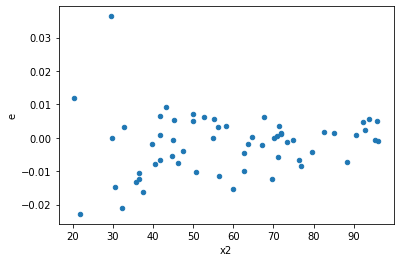

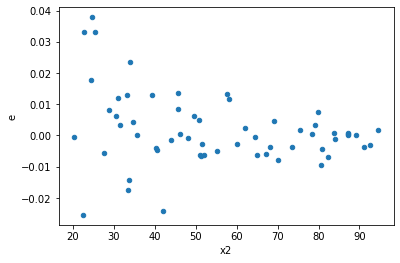

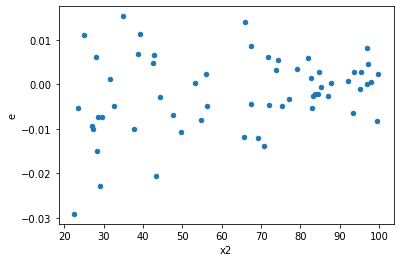

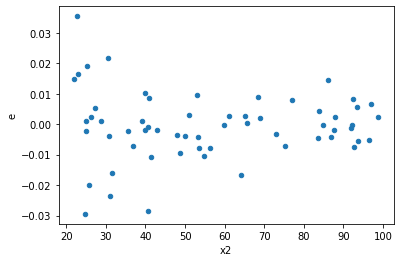

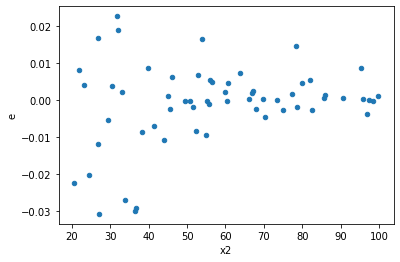

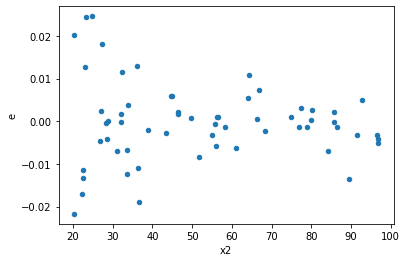

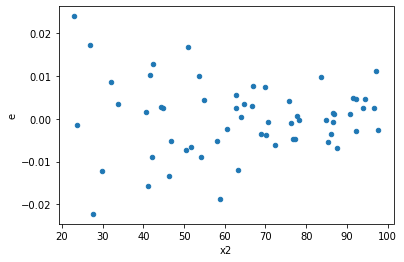

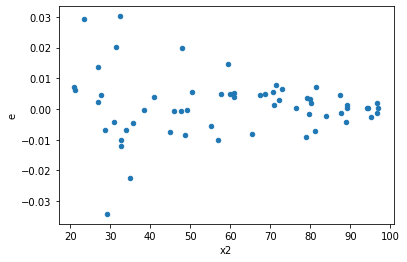

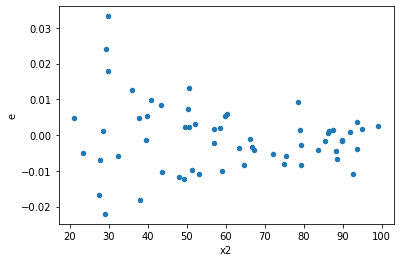

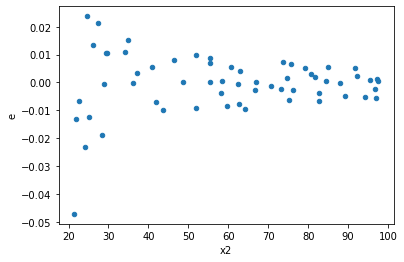

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.00038791470796734875,0.002138763075459561,1.939573539836744e-05,0.00010693815377297805,0.18137338932878136,0.00024710431793671845,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,0.0004587508717474392,0.003974042603690869,2.293754358737196e-05,0.00019870213018454344,0.11543682780888587,6.393265954034112e-06,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,0.000871458053519606,0.011344132739524799,4.3572902675980305e-05,0.00056720663697624,0.07682015659807159,1.7380031770292204e-07,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,0.0005601246580162078,0.004220477473606138,2.800623290081039e-05,0.0002110238736803069,0.13271594541591422,2.064906367616841e-05,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,0.00027757963998589324,0.004688979411279961,1.3878981999294662e-05,0.00023444897056399804,0.05919830641997247,1.543729192492333e-08,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,0.0004989917506774187,0.00779364077853029,2.4949587533870935e-05,0.0003896820389265145,0.06402550038642114,3.223475848393355e-08,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,0.0006614891907387332,0.003405780313862142,3.307445953693666e-05,0.00017028901569310711,0.19422544315214713,0.00041322091221515417,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,0.0005043905066953791,0.002237347112265299,2.5219525334768955e-05,0.00011186735561326494,0.2254413291215627,0.0012139729190825,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,0.0004171813896020561,0.0019815611887954335,2.0859069480102805e-05,9.907805943977167e-05,0.21053167167432035,0.0007456163133237033,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    992
Reject005=1 : Homoscedasticity        8
Name: Result_test, dtype: int64